In [1]:
import pandas as pd
car_sales= pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
len(car_sales)

1000

In [71]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [7]:
#split into X/y
X = car_sales.drop("Price",axis=1)
y= car_sales["Price"]
# split into training and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [8]:
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [3]:
# Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)] ,remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

NameError: name 'X' is not defined

In [10]:
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [12]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [13]:
model.score(X_test, y_test)

0.3235867221569877

# What if there were missing values?

In [14]:
car_sales_missing = pd.read_csv("data/car-sales-missing-data.csv")

In [15]:
car_sales_missing.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [16]:
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [17]:
# Create X and Y
X= car_sales_missing.drop("Price",axis=1)
y= car_sales_missing["Price"]

#  Fill missing data with pandas

In [18]:
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

/var/folders/_6/24rdfkdj2xn4x28vsp8_rz800000gn/T/ipykernel_1330/192840656.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
/var/folders/_6/24rdfkdj2xn4x28vsp8_rz800000gn/T/ipykernel_1330/192840656.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [19]:
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       2
dtype: int64

In [20]:
car_sales_missing.dropna(inplace=True)

In [21]:
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       0
dtype: int64

In [22]:
len(car_sales_missing)

8

In [23]:
X= car_sales_missing.drop("Price",axis= 1)
y= car_sales_missing["Price"]

In [24]:
# Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)] ,remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

<8x15 sparse matrix of type '<class 'numpy.float64'>'
	with 32 stored elements in Compressed Sparse Row format>

# Lets fit a model

In [25]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: '$4,000'

# Chosing the right algorithm for your problem

In [26]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing;

In [27]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [28]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [29]:
housing_df = housing_df.drop("MedHouseVal",axis=1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
from sklearn.linear_model import Ridge
np.random.seed(42)
X= housing_df.drop("target",axis=1)
y=housing_df["target"]

#split
X_train  ,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

model = Ridge()
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [30]:
# Import the Random forest regressor model class
from sklearn.ensemble import RandomForestRegressor
#setup random seed
np.random.seed(42)

#Create Data
X = housing_df.drop("target",axis=1)
y= housing_df["target"]

#split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#create random forest model
model= RandomForestRegressor()
model.fit(X_train,y_train)

#check score
model.score(X_test,y_test)


0.8059809073051385

# picking a ml model for classification problem

In [31]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
len(heart_disease)

303

In [33]:
#From map it sats to try LinearSVC
#import linear svc estimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

#Make data ready
X= heart_disease.drop(["target"],axis=1)
y= heart_disease["target"]

#split data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

#instantiate Linearsvc
clf=LinearSVC(max_iter=1000)
clf.fit(X_train,y_train)

#Ecaluate score
clf.score(X_test,y_test)

/Users/sitijacharya/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/sitijacharya/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [34]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [35]:
#From map it sats to try LinearSVC
#import linear svc estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

#Make data ready
X= heart_disease.drop(["target"],axis=1)
y= heart_disease["target"]

#split data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

#instantiate Linearsvc
clf= RandomForestClassifier()
clf.fit(X_train,y_train)

#Ecaluate score
clf.score(X_test,y_test)

0.8524590163934426

# 3 Fit the model and use it to make predictions

In [36]:
# Fitting the model to data

from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

#Make data ready
X= heart_disease.drop(["target"],axis=1)
y= heart_disease["target"]

#split data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

#instantiate Linearsvc
clf= RandomForestClassifier()
#fit data
clf.fit(X_train,y_train)

#Ecaluate score

clf.score(X_test,y_test)

0.8524590163934426

In [37]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [38]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

# Make prediction using ml model

In [39]:
# 2 ways to make predictions:

#Use a trained model to predict
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [40]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [41]:
#compare prediction to truth label
y_preds= clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [42]:
clf.score(X_test,y_test)

0.8524590163934426

In [43]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [44]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [45]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [46]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [47]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housing_df.drop(["target"],axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_preds= model.predict(X_test)


In [48]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [49]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [50]:
#conmpare prediction to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3270458119670544

In [51]:
len(y_test)

4128

In [52]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

# evaluating a ml model

In [53]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [54]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42) 
X= heart_disease.drop(["target"],axis=1)
y= heart_disease["target"]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)
clf= RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
clf.score(X_train,y_train)

1.0

In [56]:
clf.score(X_test,y_test)

0.8524590163934426

# Evaluating a model using scoring parameter


In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42) 
X= heart_disease.drop(["target"],axis=1)
y= heart_disease["target"]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)
clf= RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train);


In [58]:
clf.score(X_test,y_test)

0.8524590163934426

In [59]:
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [60]:
cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [61]:
np.random.seed(42)
#single training and test split score
clf_single_score = clf.score(X_test,y_test)

In [62]:
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

# Classification model evaluation metrics

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X= heart_disease.drop("target",axis=1)
y=heart_disease["target"]
clf= RandomForestClassifier()
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [64]:
# area under the receiver operating characteristics curve

In [65]:
X_train , X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [66]:
from sklearn.metrics import roc_curve
clf.fit(X_train,y_train)
y_probs = clf.predict_proba(X_test)
y_probs[:10],len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.11, 0.89],
        [0.3 , 0.7 ],
        [0.98, 0.02],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [67]:
y_probs_positive= y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.89, 0.7 , 0.02, 0.85, 0.6 ])

In [68]:
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)
fpr


array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.06896552, 0.10344828, 0.13793103,
       0.13793103, 0.13793103, 0.20689655, 0.20689655, 0.20689655,
       0.27586207, 0.37931034, 0.37931034, 0.48275862, 0.48275862,
       0.55172414, 0.55172414, 0.5862069 , 0.65517241, 0.82758621,
       0.89655172, 1.        ])

# confusion matrix

In [69]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [70]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [71]:
import sklearn
sklearn.__version__


'1.4.2'

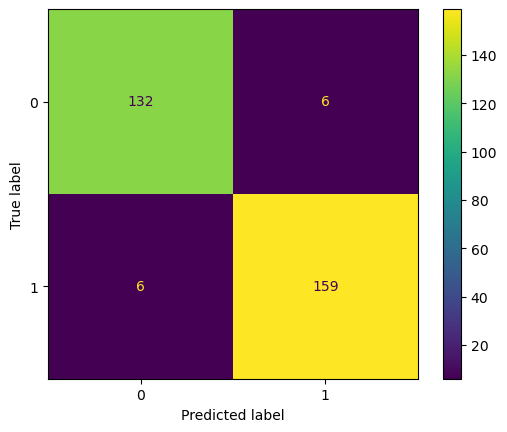

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

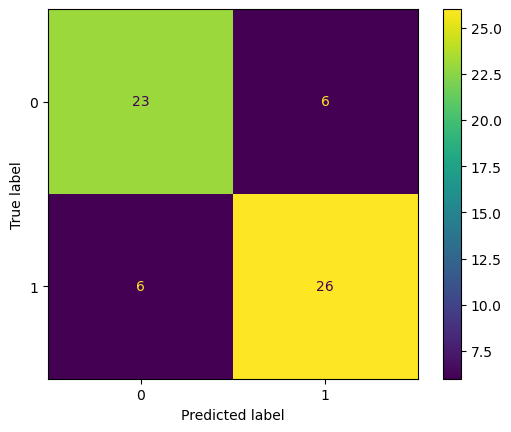

In [73]:
ConfusionMatrixDisplay.from_predictions(y_true= y_test,y_pred = y_preds)

# Classification Report

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [75]:
disease_true = np.zeros(10000)
disease_true[0]=1

disease_preds= np.zeros(10000)
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

/Users/sitijacharya/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sitijacharya/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sitijacharya/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [85]:
# Regression model evaluation metrics
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housing_df.drop(["target"],axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

In [86]:
model.score(X_test,y_test)

0.8059809073051385

In [87]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [88]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [89]:
y_test.mean()

2.0550030959302323

In [90]:
from sklearn.metrics import r2_score
y_test_mean = np.full(len(y_test),y_test.mean())

In [91]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [92]:
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

In [93]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.3270458119670544

In [94]:
df = pd.DataFrame(data={"actual values": y_test,"predicted values": y_preds})
df["differences"] = df ["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390
13311,1.58700,1.658080,0.071080
7113,1.98200,2.342370,0.360370
7668,1.57500,1.667080,0.092080
18246,3.40000,2.560960,-0.839040
5723,4.46600,4.851978,0.385978


In [95]:
df["differences"].mean()

0.011913192441860052

In [96]:
from sklearn.metrics import mean_squared_error

y_preds= model.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
mse

0.2542443610174998

# EValuating using score model

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
clf = RandomForestClassifier(n_estimators=100)

In [99]:
cv_acc= cross_val_score(clf,X,y,cv=5,scoring=None)
cv_acc

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [101]:
print(f"Tthe cv accuracy is:{np.mean(cv_acc)*100:.2f}%")

Tthe cv accuracy is:80.18%


In [102]:
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [103]:
np.mean(cv_recall)

0.8545454545454545

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
model = RandomForestRegressor()

In [106]:
np.random.seed(42)
cv_r2= cross_val_score(model,X,y,cv=3,scoring=None)
np.mean(cv_r2)

0.6538469004539024

In [110]:
cv_mse = cross_val_score(model,X,y,cv=3,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.460811076287665

In [111]:
cv_mae = cross_val_score(model,X,y,cv=3,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.48418552498062023

# Using different evaluation metrics as skitlearn function

In [114]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#create x and y
np.random.seed(42)
X= heart_disease.drop(["target"],axis=1)
y= heart_disease["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)
print("Classifier metrics on test set")
print(f"Accuracy:{accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision:{precision_score(y_test,y_preds)*100:.2f}%")
print(f"Recall:{recall_score(y_test,y_preds)*100:.2f}%")
print(f"F1:{f1_score(y_test,y_preds)*100:.2f}%")



Classifier metrics on test set
Accuracy:85.25%
Precision:84.85%
Recall:87.50%
F1:86.15%


In [115]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from  sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Improving a model

In [116]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [117]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Tuning hyperparameters by hand

lets make 3 sets,training,validation and test
we are going to try and adjust:
max depth
max features
min samples leaf
min samples split
n_estimators

In [122]:
def evaluate_preds(y_true,y_preds):
    accuracy= accuracy_score(y_true,y_preds)
    precision= precision_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    metric_dict= {"accuracy" : round(accuracy,2),
                  "precision" : round(precision,2),
                  "recall" : round(recall,2),
                  "f1": round(f1,2)}
    print(f"Acc:{accuracy * 100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 score:{f1:.2f}")
    
    return metric_dict
    

In [124]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
heart_disease_shuffled = heart_disease.sample(frac=1)
X= heart_disease_shuffled.drop("target",axis=1)
y= heart_disease["target"]
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split= round(train_split +0.15 * len(heart_disease_shuffled))
X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_preds=clf.predict(X_valid)

#evaluate the classifier on validation sets
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc:0.00%
Precision:0.00
Recall:0.00
F1 score:0.00


/Users/sitijacharya/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}

In [125]:
# create a second classifier with different hyperparameter
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)
# Make predictions with diff hyperparameter 
y_preds_2 = clf_2.predict(X_valid)

# evaluate the second classifier
clf_2_metrics = evaluate_preds(y_valid,y_preds_2)

Acc:6.67%
Precision:0.00
Recall:0.00
F1 score:0.00


/Users/sitijacharya/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Putting it all together


In [5]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [6]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [7]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [8]:
data.dropna(subset=["Price"],inplace=True)

In [9]:
data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64